**Job Market Analysis of India**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df=pd.read_csv("/content/drive/MyDrive/python project new/ job growth analysis over years using pyspark/naukri_com-job_sample.csv")
df

,company,education,experience,industry,jobdescription,jobid,joblocation_address,jobtitle,numberofpositions,payrate,postdate,site_name,skills,uniq_id
0,MM Media Pvt Ltd,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,0 - 1 yrs,Media / Entertainment / Internet,Job Description Send me Jobs like this Quali...,210516002263,Chennai,Walkin Data Entry Operator (night Shift),NaN,"1,50,000 - 2,25,000 P.A",2016-05-21 19:30:00 +0000,NaN,ITES,43b19632647068535437c774b6ca6cf8
1,find live infotech,UG: B.Tech/B.E. - Any Specialization PG:MBA/PG...,0 - 0 yrs,Advertising / PR / MR / Event Management,Job Description Send me Jobs like this Quali...,210516002391,Chennai,Work Based Onhome Based Part Time.,60.0,"1,50,000 - 2,50,000 P.A. 20000",2016-05-21 19:30:00 +0000,NaN,Marketing,d4c72325e57f89f364812b5ed5a795f0
2,Softtech Career Infosystem Pvt. Ltd,UG: Any Graduate - Any Specialization PG:Any P...,4 - 8 yrs,IT-Software / Software Services,Job Description Send me Jobs like this - as ...,101016900534,Bengaluru,Pl/sql Developer - SQL,NaN,Not Disclosed by Recruiter,2016-10-13 16:20:55 +0000,NaN,IT Software - Application Programming,c47df6f4cfdf5b46f1fd713ba61b9eba
3,Onboard HRServices LLP,UG: Any Graduate - Any Specialization PG:CA Do...,11 - 15 yrs,Banking / Financial Services / Broking,Job Description Send me Jobs like this - Inv...,81016900536,"Mumbai, Bengaluru, Kolkata, Chennai, Coimbator...",Manager/ad/partner - Indirect Tax - CA,NaN,Not Disclosed by Recruiter,2016-10-13 16:20:55 +0000,NaN,Accounts,115d28f140f694dd1cc61c53d03c66ae
4,Spire Technologies and Solutions Pvt. Ltd.,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,6 - 8 yrs,IT-Software / Software Services,Job Description Send me Jobs like this Pleas...,120916002122,Bengaluru,JAVA Technical Lead (6-8 yrs) -,4.0,Not Disclosed by Recruiter,2016-10-13 16:20:55 +0000,NaN,IT Software - Application Programming,a12553fc03bc7bcced8b1bb8963f97b4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21995,Morgan Stanley Advantage Services Pvt. Ltd.,UG: Any Graduate - Any Specialization,9 - 13 yrs,Banking / Financial Services / Broking,Job Description Send me Jobs like this Greet...,241116007152,Bengaluru,Quality Assurance - VP with Morgan Stanley Ban...,2.0,Not Disclosed by Recruiter,2016-11-25 22:47:05 +0000,www.naukri.com,IT Software - QA & Testing,ef40136e3b0c0abdab695d979a4b7153
21996,Careernet Technologies Pvt Ltd hiring for Client,UG: B.Tech/B.E. - Any Specialization PG:M.Tech...,3 - 5 yrs,IT-Software / Software Services,Job Description Send me Jobs like this Looki...,241116001104,"Bengaluru, Gurgaon",Java Backend Developers for a Product Company,NaN,"8,50,000 - 14,00,000 P.A",2016-11-24 22:47:05 +0000,www.naukri.com,IT Software - Application Programming,acb80b7bb109fa76d22d1f11c6e16c6a
21997,Musk - Startup,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,2 - 4 yrs,Internet / Ecommerce,Job Description Send me Jobs like this Work ...,251116900644,Bengaluru,Full Stack Development Engineer,NaN,Not Disclosed by Recruiter,2016-11-25 22:47:05 +0000,www.naukri.com,IT Software - Application Programming,f6f2885a6c87572616fb766029a0d284
21998,Confidential,UG: B.Tech/B.E. - Any Specialization PG:MCA - ...,7 - 12 yrs,IT-Software / Software Services,Job Description Send me Jobs like this We ar...,231116901329,"Delhi NCR, Bengaluru",Sr UI Developer/ Technical Lead - Html/ CSS/ J...,NaN,Not Disclosed by Recruiter,2016-11-27 22:47:05 +0000,www.naukri.com,IT Software - Application Programming,c6f6538cb1007dd02c1b4b77909b3d38


In [3]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.3/317.3 MB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.2-py2.py3-none-any.whl size=317812365 sha256=e3424ba65281d176a73c7296314d0ca893dc8a204dc0b78acb46c4bcc963eabb
  Stored in directory: /root/.cache/pip/wheels/34/34/bd/03944534c44b677cd5859f248090daa9fb27b3c8f8e5f49574
Successfully built pyspark


In [6]:
from pyspark.sql import SparkSession

# Initialize Spark session with legacy time parser policy
spark = SparkSession.builder \
    .appName("Job Growth Analysis") \
    .config("spark.sql.legacy.timeParserPolicy", "LEGACY") \
    .getOrCreate()


In [7]:
from pyspark.sql.functions import col, to_timestamp, year

# Initialize Spark session
spark = SparkSession.builder \
    .appName("Job Growth Analysis") \
    .getOrCreate()

# Load data into PySpark DataFrame
df_spark = spark.read.csv("/content/drive/MyDrive/python project new/ job growth analysis over years using pyspark/naukri_com-job_sample.csv", header=True, inferSchema=True)

# Data cleaning
# Convert 'postdate' column to timestamp type with timezone information
df_spark = df_spark.withColumn("date", to_timestamp(col("postdate"), "yyyy-MM-dd HH:mm:ss Z"))

# Extract year from the timestamp
df_spark = df_spark.withColumn("year", year(col("date")))

# Drop rows with missing values in relevant columns
df_spark = df_spark.dropna(subset=["postdate", "jobtitle"])

# Show cleaned data
df_spark.show()


+--------------------+--------------------+-----------+--------------------+--------------------+------------+--------------------+--------------------+-----------------+--------------------+--------------------+---------+--------------------+--------------------+-------------------+----+
|             company|           education| experience|            industry|      jobdescription|       jobid| joblocation_address|            jobtitle|numberofpositions|             payrate|            postdate|site_name|              skills|             uniq_id|               date|year|
+--------------------+--------------------+-----------+--------------------+--------------------+------------+--------------------+--------------------+-----------------+--------------------+--------------------+---------+--------------------+--------------------+-------------------+----+
|    MM Media Pvt Ltd|UG: B.Tech/B.E. -...|  0 - 1 yrs|Media / Entertain...|Job Description  ...|210516002263|             Chennai

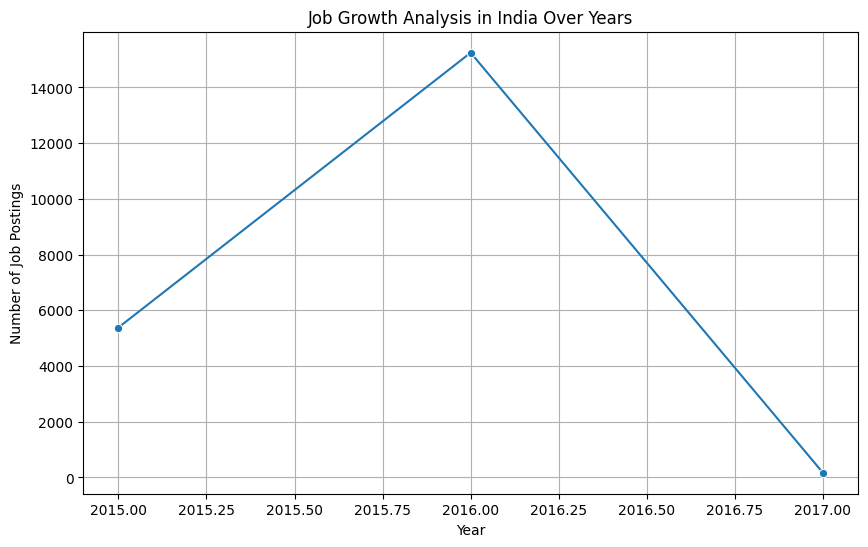

In [8]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, to_date, year, count
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize Spark session with legacy time parser policy
spark = SparkSession.builder \
    .appName("Job Growth Analysis") \
    .config("spark.sql.legacy.timeParserPolicy", "LEGACY") \
    .getOrCreate()

# Load data into PySpark DataFrame
df_spark = spark.read.csv("/content/drive/MyDrive/python project new/ job growth analysis over years using pyspark/naukri_com-job_sample.csv", header=True, inferSchema=True)

# Data cleaning
df_spark = df_spark.withColumn("date", to_date(col("postdate"), "yyyy-MM-dd HH:mm:ss"))
df_spark = df_spark.withColumn("year", year(col("date")))
df_spark = df_spark.dropna(subset=["postdate", "jobtitle"])

# Trend calculation
job_growth_df = df_spark.groupBy("year").agg(count("jobtitle").alias("job_count"))

# Convert PySpark DataFrame to Pandas DataFrame for visualization
job_growth_pd = job_growth_df.toPandas()

# Visualization
plt.figure(figsize=(10, 6))
sns.lineplot(data=job_growth_pd, x='year', y='job_count', marker='o')
plt.title('Job Growth Analysis in India Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Job Postings')
plt.grid(True)
plt.show()

# Stop the Spark session
#spark.stop()
